# SKEMPI v2 Data Analysis

Dataset downloaded from https://life.bsc.es/pid/skempi2/database/index (11.06.2022)

In [1]:
import os
import pandas as pd

from abag_affinity.utils.config import read_yaml, get_resources_paths

In [2]:
config = read_yaml("../../abag_affinity/config.yaml")
skempi_csv_name, skempi_pdb_folder = get_resources_paths(config, "SKEMPI.v2")

In [3]:
len(os.listdir(skempi_pdb_folder))

1393

In [4]:
skempi_df = pd.read_csv(skempi_csv_name, sep=";")
skempi_df.head(10)

,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),Affinity_mut_parsed,Affinity_wt (M),Affinity_wt_parsed,...,koff_mut_parsed,koff_wt (s^(-1)),koff_wt_parsed,dH_mut (kcal mol^(-1)),dH_wt (kcal mol^(-1)),dS_mut (cal mol^(-1) K^(-1)),dS_wt (cal mol^(-1) K^(-1)),Notes,Method,SKEMPI version
0,1CSE_E_I,LI45G,LI38G,COR,Pr/PI,Pr/PI,5.26E-11,5.260000e-11,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
1,1CSE_E_I,LI45S,LI38S,COR,Pr/PI,Pr/PI,8.33E-12,8.330000e-12,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
2,1CSE_E_I,LI45P,LI38P,COR,Pr/PI,Pr/PI,1.02E-07,1.020000e-07,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
3,1CSE_E_I,LI45I,LI38I,COR,Pr/PI,Pr/PI,1.72E-10,1.720000e-10,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
4,1CSE_E_I,LI45D,LI38D,COR,Pr/PI,Pr/PI,1.92E-09,1.920000e-09,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
5,1CSE_E_I,LI45E,LI38E,COR,Pr/PI,Pr/PI,6.25E-11,6.250000e-11,1.12E-12,1.120000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
6,1ACB_E_I,LI45G,LI38G,COR,Pr/PI,Pr/PI,4.55E-08,4.550000e-08,1.49E-12,1.490000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
7,1ACB_E_I,LI45S,LI38S,COR,Pr/PI,Pr/PI,7.14E-09,7.140000e-09,1.49E-12,1.490000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
8,1ACB_E_I,LI45P,LI38P,COR,Pr/PI,Pr/PI,1.85E-07,1.850000e-07,1.49E-12,1.490000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1
9,1ACB_E_I,LI45I,LI38I,COR,Pr/PI,Pr/PI,2.08E-09,2.080000e-09,1.49E-12,1.490000e-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IASP,1


In [5]:
skempi_df["iMutation_Location(s)"].value_counts()

COR                                        2237
RIM                                        1134
SUP                                         714
SUR                                         629
INT                                         398
                                           ... 
RIM,COR,COR,RIM,RIM,COR,RIM,SUR,SUR,SUR       1
SUR,RIM,COR,COR,RIM,RIM,SUR,SUR               1
RIM,COR,RIM,RIM,SUR,COR,SUR,SUR               1
RIM,COR,COR,RIM,INT,COR,RIM,SUR,SUR           1
INT,SUP,SUP                                   1
Name: iMutation_Location(s), Length: 487, dtype: int64

In [6]:
skempi_df = skempi_df[skempi_df["iMutation_Location(s)"].isin(["COR", "RIM", "SUP"])].copy()

In [7]:
print("Conformation unique PDB Ids >>>", len(skempi_df["#Pdb"].unique()))
print("Mutation unique PDB Ids >>>", len(skempi_df["Mutation(s)_PDB"].unique()))

Conformation unique PDB Ids >>> 301
Mutation unique PDB Ids >>> 2379


In [8]:
unique_proteins = set(skempi_df["Protein 1"].unique()).union(set(skempi_df["Protein 2"].unique()) )

print("Number of Unique Proteins >>>", len(unique_proteins))

Number of Unique Proteins >>> 334


In [9]:
ab_skempi = skempi_df[skempi_df["Hold_out_type"] == "AB/AG"].copy()
print("Antibody Conformation unique PDB Ids >>>", len(ab_skempi))

unique_proteins = set(ab_skempi["Protein 1"].unique()).union(set(ab_skempi["Protein 2"].unique()) )

print("Conformation unique PDB Ids >>>", len(ab_skempi["#Pdb"].unique()))
print("Number of Unique Proteins >>>", len(unique_proteins))

Antibody Conformation unique PDB Ids >>> 660
Conformation unique PDB Ids >>> 46
Number of Unique Proteins >>> 57


In [10]:
skempi_pdb_ids = ab_skempi["#Pdb"].unique().tolist()
skempi_pdb_ids = [pdb_id.split("_")[0].lower() for pdb_id in  skempi_pdb_ids ]

In [11]:
from abag_affinity.utils.config import get_data_paths
dataset_v1_path, _ = get_data_paths(config, "Dataset_v1")
dataset_v1_df = pd.read_csv(dataset_v1_path)
data_v1_ids = set(dataset_v1_df["pdb"].unique().tolist())

In [12]:
len(set(skempi_pdb_ids).intersection(data_v1_ids))

21

In [13]:
protein_skempi = skempi_df[skempi_df["Hold_out_type"].isin(["AB/AG", "Pr/PI", "AB/AG,Pr/PI"])].copy()

protein_skempi["pdb"] = protein_skempi["#Pdb"].apply(lambda x: x.split("_")[0].lower() )
protein_skempi = protein_skempi[~protein_skempi["pdb"].isin(data_v1_ids)]

print("Antibody Conformation unique PDB Ids >>>", len(protein_skempi))

unique_proteins = set(protein_skempi["Protein 1"].unique()).union(set(protein_skempi["Protein 2"].unique()) )

print("Conformation unique PDB Ids >>>", len(protein_skempi["#Pdb"].unique()))
print("Number of Unique Proteins >>>", len(unique_proteins))

Antibody Conformation unique PDB Ids >>> 1392
Conformation unique PDB Ids >>> 79
Number of Unique Proteins >>> 49


### Convert Mutations Codes

In [14]:
def convert_mutation_code(row):
    skempi_code = row["Mutation(s)_cleaned"]
    codes = skempi_code.split(",")
    
    new_codes = []
    for code in codes:
        wt_res = code[0]
        chain = code[1]
        index = code[2:-1]
        mut_res = code[-1]
        new_codes.append(f"{chain}_ {wt_res}{index}{mut_res}")
        
    return ";".join(new_codes)

protein_skempi["mutation_code"] = protein_skempi.apply(lambda row: convert_mutation_code(row), axis=1)

### Analyse change in affinity

In [15]:
protein_skempi["affinity_change"] = protein_skempi["Affinity_wt_parsed"] - protein_skempi["Affinity_mut_parsed"]

In [16]:
protein_skempi["affinity_change"].describe()

count    1.374000e+03
mean    -4.212384e-06
std      1.218194e-04
min     -4.499696e-03
25%     -1.012568e-08
50%     -3.797400e-10
75%     -4.740000e-12
max      6.670000e-05
Name: affinity_change, dtype: float64

<AxesSubplot:>

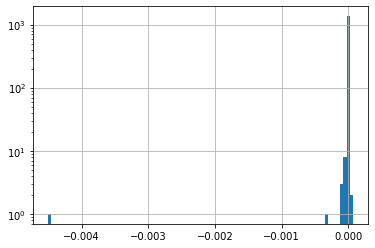

In [17]:
import matplotlib.pyplot as plt
plt.yscale("log")
protein_skempi["affinity_change"].hist(bins=100)

### Analysis of affinity values

In [18]:
protein_skempi["Affinity_wt_parsed"].describe()

count    1.392000e+03
mean     1.084417e-07
std      2.004649e-06
min      5.000000e-14
25%      1.790000e-11
50%      2.940000e-11
75%      1.640000e-10
max      6.670000e-05
Name: Affinity_wt_parsed, dtype: float64

<AxesSubplot:>

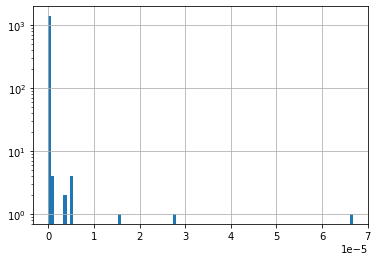

In [19]:
plt.yscale("log")
protein_skempi["Affinity_wt_parsed"].hist(bins=100)

### Convert to delta_g

In [20]:
import numpy as np

gas_constant =  8.31446261815324 # 0.0821 kcal

def calc_delta_g(row, affinity_col):
    temperature = row["Temperature_cleaned"]
    affinity = row[affinity_col]
    delta_g = gas_constant * temperature * np.log(affinity)
    return delta_g / 4184 # convert to kcal

def clean_temp(value):
    value = value.replace("(assumed)", "")
    try:
        return int(value)
    except:
        return np.nan
            

In [21]:
protein_skempi["Temperature_cleaned"] = protein_skempi["Temperature"].apply(lambda val: clean_temp(val))

In [22]:
protein_skempi["delta_g_wt"] = protein_skempi.apply(lambda row: calc_delta_g(row,"Affinity_wt_parsed"), axis=1)
protein_skempi["delta_g_mut"] = protein_skempi.apply(lambda row: calc_delta_g(row,"Affinity_mut_parsed"), axis=1)

In [23]:
protein_skempi["delta_g_wt"].describe()

count    1392.000000
mean      -13.548241
std         1.828994
min       -17.954176
25%       -14.457684
50%       -14.167788
75%       -13.163558
max        -5.636735
Name: delta_g_wt, dtype: float64

<AxesSubplot:>

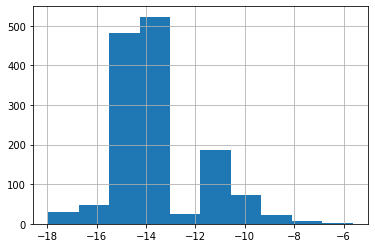

In [24]:
protein_skempi["delta_g_wt"].hist(bins=10)

In [25]:
protein_skempi["delta_g_mut"].describe()

count    1374.000000
mean      -12.143080
std         2.400384
min       -18.435456
25%       -13.987910
50%       -12.417567
75%       -10.499075
max        -3.221464
Name: delta_g_mut, dtype: float64

<AxesSubplot:>

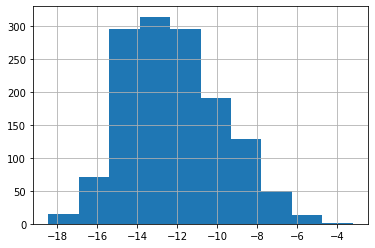

In [26]:
protein_skempi["delta_g_mut"].hist(bins=10)

In [27]:
protein_skempi["delta_g_change"] = protein_skempi["delta_g_wt"] - protein_skempi["delta_g_mut"]

In [28]:
protein_skempi["delta_g_change"].describe()

count    1374.000000
mean       -1.436783
std         2.366604
min       -12.222403
25%        -2.619570
50%        -1.131898
75%        -0.101098
max        12.222403
Name: delta_g_change, dtype: float64

<AxesSubplot:>

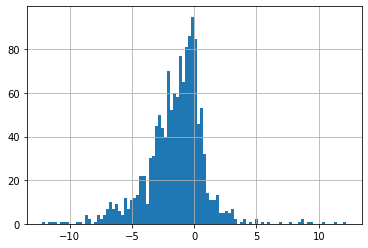

In [29]:
#plt.yscale("log")
protein_skempi["delta_g_change"].hist(bins=100)

## Convert to -log(Kd)

In [30]:
protein_skempi["-log(Kd)_wt"] = protein_skempi["Affinity_wt_parsed"].apply(lambda kd: -np.log10(kd))
protein_skempi["-log(Kd)_mut"] = protein_skempi["Affinity_mut_parsed"].apply(lambda kd: -np.log10(kd))

protein_skempi["affinity_change"] = protein_skempi.apply(lambda row: row["Affinity_wt_parsed"] - row["Affinity_mut_parsed"], axis=1)

<AxesSubplot:>

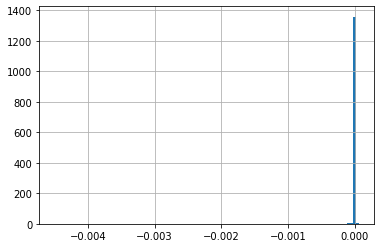

In [31]:
protein_skempi["affinity_change"].hist(bins=100)

<AxesSubplot:>

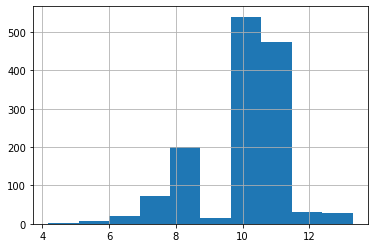

In [32]:
protein_skempi["-log(Kd)_wt"].hist(bins=10)

<AxesSubplot:>

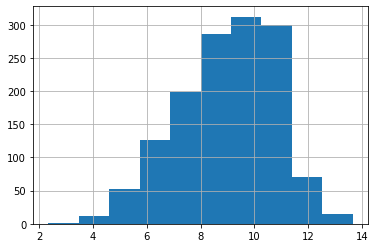

In [33]:
protein_skempi["-log(Kd)_mut"].hist(bins=10)

In [34]:
summary_path, _ = get_data_paths(config, "SKEMPI.v2")
protein_skempi = protein_skempi[["pdb", "#Pdb", "mutation_code", "Mutation(s)_cleaned", "iMutation_Location(s)", "Temperature_cleaned", "delta_g_mut", "delta_g_wt", "-log(Kd)_mut", "-log(Kd)_wt"]]
protein_skempi.to_csv(summary_path, index=False)

In [35]:
protein_skempi

,pdb,#Pdb,mutation_code,Mutation(s)_cleaned,iMutation_Location(s),Temperature_cleaned,delta_g_mut,delta_g_wt,-log(Kd)_mut,-log(Kd)_wt
0,1cse,1CSE_E_I,I_ L38G,LI38G,COR,294,-13.827924,-16.076883,10.279014,11.950782
1,1cse,1CSE_E_I,I_ L38S,LI38S,COR,294,-14.904589,-16.076883,11.079355,11.950782
2,1cse,1CSE_E_I,I_ L38P,LI38P,COR,294,-9.405235,-16.076883,6.991400,11.950782
3,1cse,1CSE_E_I,I_ L38I,LI38I,COR,294,-13.135732,-16.076883,9.764472,11.950782
4,1cse,1CSE_E_I,I_ L38D,LI38D,COR,294,-11.726207,-16.076883,8.716699,11.950782
...,...,...,...,...,...,...,...,...,...,...
6773,3se9,3SE9_HL_G,L_ E90A,EL90A,COR,303,-10.122434,-10.539794,7.301030,7.602060
6774,3se9,3SE9_HL_G,L_ F91A,FL91A,RIM,303,-10.516178,-10.539794,7.585027,7.602060
7043,1yqv,1YQV_HL_Y,Y_ R45K,RY45K,COR,283,-12.900786,-14.800290,9.962574,11.429457
7044,1yqv,1YQV_HL_Y,Y_ R45K,RY45K,COR,298,-12.499560,-14.500802,9.166853,10.634512
